# Librerias

In [3862]:
# Procesamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos nuestros datasets

In [3863]:
# Cargamos nuestros dos datasets
energia = pd.read_csv("Data/Datos_Energia.csv")
climaticos = pd.read_csv("Data/Datos_Climaticos.csv")

# Análisis de los datasets

In [3864]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  78888 non-null  int64  
 1   Mes                  78888 non-null  int64  
 2   Día                  78888 non-null  int64  
 3   Hora                 78888 non-null  int64  
 4   Día de la semana     78888 non-null  int64  
 5   Electricidad (kW)    78871 non-null  float64
 6   Fotovoltaica (kW)    78871 non-null  float64
 7   Refrigeración (kW)   78871 non-null  float64
 8   Calefacción (kWh)    78871 non-null  float64
 9   Energía total (kWh)  78871 non-null  float64
 10  Emisión (kg CO₂)     78871 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 6.6 MB


In [3865]:
# Información del dataset
climaticos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78888 entries, 0 to 78887
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Año                         78888 non-null  int64  
 1   Mes                         78888 non-null  int64  
 2   Día                         78888 non-null  int64  
 3   Hora                        78888 non-null  int64  
 4   Día de la semana            78888 non-null  int64  
 5   Temperatura (°C)            78701 non-null  float64
 6   Punto de rocío (°C)         78701 non-null  float64
 7   Humedad (%)                 78701 non-null  float64
 8   Dirección del viento        78355 non-null  object 
 9   Velocidad del viento (m/s)  78701 non-null  float64
 10  Ráfaga de viento (m/s)      78701 non-null  float64
 11  Presión (hPa)               78701 non-null  float64
 12  Precipitación (mm)          78701 non-null  float64
 13  Condición meteorológica     786

# Creamos el DatetimeIndex en nuestros datasets

In [3866]:
# Creamos un datetime con el año, mes, dia y hora (minutos y segundos lo ponemos a 00 los dos)
energia.index = pd.to_datetime(energia['Año'].astype(str) + '-' + energia['Mes'].astype(str) + '-' + energia['Día'].astype(str) + ' ' + energia['Hora'].astype(str) + ':00:00')
climaticos.index = pd.to_datetime(climaticos['Año'].astype(str) + '-' + climaticos['Mes'].astype(str) + '-' + climaticos['Día'].astype(str) + ' ' + climaticos['Hora'].astype(str) + ':00:00')

# Eliminamos las columnas que hemos utilizado para crear el datetime
energia = energia.drop(columns=['Año', 'Mes', 'Día', 'Hora'])
climaticos = climaticos.drop(columns=['Año', 'Mes', 'Día', 'Hora'])

In [3867]:
# Información del dataset
energia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Día de la semana     78888 non-null  int64  
 1   Electricidad (kW)    78871 non-null  float64
 2   Fotovoltaica (kW)    78871 non-null  float64
 3   Refrigeración (kW)   78871 non-null  float64
 4   Calefacción (kWh)    78871 non-null  float64
 5   Energía total (kWh)  78871 non-null  float64
 6   Emisión (kg CO₂)     78871 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 4.8 MB


In [3868]:
# Información del dataset
climaticos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Día de la semana            78888 non-null  int64  
 1   Temperatura (°C)            78701 non-null  float64
 2   Punto de rocío (°C)         78701 non-null  float64
 3   Humedad (%)                 78701 non-null  float64
 4   Dirección del viento        78355 non-null  object 
 5   Velocidad del viento (m/s)  78701 non-null  float64
 6   Ráfaga de viento (m/s)      78701 non-null  float64
 7   Presión (hPa)               78701 non-null  float64
 8   Precipitación (mm)          78701 non-null  float64
 9   Condición meteorológica     78695 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.6+ MB


# Juntamos los dos datasets

Puesto que los dos datasets tienen la columna "Día de la semana" en la cual no hay nulos (y por tanto no hay diferencias diferencias), decidimos eliminar uno de ellos.

In [3869]:
# Eliminamos columnas
climaticos = climaticos.drop(columns=['Día de la semana'])

In [3870]:
# Juntamos los dos datasets a partir del DatetimeIndex
energia_climaticos = energia.join(climaticos, how='inner')

In [3871]:
# Información del dataset
energia_climaticos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78888 entries, 2014-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Día de la semana            78888 non-null  int64  
 1   Electricidad (kW)           78871 non-null  float64
 2   Fotovoltaica (kW)           78871 non-null  float64
 3   Refrigeración (kW)          78871 non-null  float64
 4   Calefacción (kWh)           78871 non-null  float64
 5   Energía total (kWh)         78871 non-null  float64
 6   Emisión (kg CO₂)            78871 non-null  float64
 7   Temperatura (°C)            78701 non-null  float64
 8   Punto de rocío (°C)         78701 non-null  float64
 9   Humedad (%)                 78701 non-null  float64
 10  Dirección del viento        78355 non-null  object 
 11  Velocidad del viento (m/s)  78701 non-null  float64
 12  Ráfaga de viento (m/s)      78701 non-null  float64
 

# Tratamiento de duplicados

Primero analizaremos si hay duplicados, y en caso de que los haya eliminarlos

In [3872]:
# Visualizamos la cantidad de duplicados del dataset
energia_climaticos.duplicated().sum()


np.int64(0)

No hay ningún nulo en nuestro dataset

# Tratamiento de nulos

In [3873]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana                0
Electricidad (kW)              17
Fotovoltaica (kW)              17
Refrigeración (kW)             17
Calefacción (kWh)              17
Energía total (kWh)            17
Emisión (kg CO₂)               17
Temperatura (°C)              187
Punto de rocío (°C)           187
Humedad (%)                   187
Dirección del viento          533
Velocidad del viento (m/s)    187
Ráfaga de viento (m/s)        187
Presión (hPa)                 187
Precipitación (mm)            187
Condición meteorológica       193
dtype: int64

Como se puede ver hay pocos nulos, por lo que podriamos eliminarlos o imputarlos, en nuestro caso, como no queremos eliminar ya que no queremos perder datos, decidimor imputar, para ello analizamos cómo funciona el dataset

In [3874]:
# Visualizamos las 5 primeras columnas del dataset
energia_climaticos.head()

,Día de la semana,Electricidad (kW),Fotovoltaica (kW),Refrigeración (kW),Calefacción (kWh),Energía total (kWh),Emisión (kg CO₂),Temperatura (°C),Punto de rocío (°C),Humedad (%),Dirección del viento,Velocidad del viento (m/s),Ráfaga de viento (m/s),Presión (hPa),Precipitación (mm),Condición meteorológica
2014-01-01 00:00:00,2,21294.33,2.39,8098.10352,876.28229,30268.37288,18880.0,11.666667,-17.777778,45.0,CALMA,0.00000,0.0,977.312154,0.0,Despejado
2014-01-01 01:00:00,2,21190.46,1.95,7312.22987,873.35158,29377.43704,18320.0,10.555556,0.555556,50.0,E,2.23520,0.0,977.312154,0.0,Despejado
2014-01-01 02:00:00,2,21537.07,4.29,7305.86410,911.45081,29752.56792,18560.0,10.000000,-17.777778,50.0,ESE,1.34112,0.0,977.312154,0.0,Despejado
2014-01-01 03:00:00,2,21688.66,9.65,7573.82433,870.42087,30130.62951,18790.0,9.444444,-17.777778,52.0,ESE,2.68224,0.0,977.312154,0.0,Despejado
2014-01-01 04:00:00,2,23044.40,10.19,7462.96849,946.61933,31455.31043,19620.0,9.444444,-17.777778,52.0,CALMA,0.00000,0.0,977.650793,0.0,Despejado


## imputación mediante interpolación temporal

En nuestro dataset, nuestros datos están organizados por horas, por lo que pensamos aprovecharnos sobre ello. Por lo tanto, "method = time" utiliza el DatetimeIndex para estimar los valores faltantes teniendo en cuenta la distancia real entre timestamps (en este caso, horas). Viendo la documentación, vemos cómo funciona en datos diarios o con mayor resolución, por lo que es adecuado para series horarias como esta. Además, al haber pocos valores nulos, la interpolación temporal proporciona una aproximación suave y coherente sin distorsionar el comportamiento general de la serie.

In [3875]:
# Seleccionamos todas las columnas numéricas del dataset
numericas = energia_climaticos.select_dtypes(include='number').columns
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos[numericas] = energia_climaticos[numericas].interpolate(method='time')

Como este método solo se puede usar en columnas numéricas, seleccionamos esas columnas y realizamos la operación, dejandonos que sólo nos queden nulos en las dos variables de tipo object, en las cuales debemos utilizar un método diferente.

In [3876]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana                0
Electricidad (kW)               0
Fotovoltaica (kW)               0
Refrigeración (kW)              0
Calefacción (kWh)               0
Energía total (kWh)             0
Emisión (kg CO₂)                0
Temperatura (°C)                0
Punto de rocío (°C)             0
Humedad (%)                     0
Dirección del viento          533
Velocidad del viento (m/s)      0
Ráfaga de viento (m/s)          0
Presión (hPa)                   0
Precipitación (mm)              0
Condición meteorológica       193
dtype: int64

## imputación mediante último y siguiente valor observado.

Para los nulos en las variables "object" hemos decidido en utilizar `ffill()` y `bfill()`, ya que como cogen el valor anterior o posterior respectivamente, pensamos en utilizarlos juntos por si al aplicar uno de ellos sigue habiendo nulos según como estén distribuidos en nuestro dataset. Además, la dirección del viento y la condición meteorológica no son variables tan volubles que cambien fácilmente cada hora, por lo que pensamos que son los métodos adecuados para estas dos variables.

In [3877]:
# Rellenamos las columnas con el valor anterior y posterior (ffill y bfill respectivamente)
energia_climaticos['Dirección del viento'] = energia_climaticos['Dirección del viento'].ffill().bfill()
energia_climaticos['Condición meteorológica'] = energia_climaticos['Condición meteorológica'].ffill().bfill()

Con esto podemos observar cómo hemos eliminado todos los nulos de nuestro dataset.

In [3878]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana              0
Electricidad (kW)             0
Fotovoltaica (kW)             0
Refrigeración (kW)            0
Calefacción (kWh)             0
Energía total (kWh)           0
Emisión (kg CO₂)              0
Temperatura (°C)              0
Punto de rocío (°C)           0
Humedad (%)                   0
Dirección del viento          0
Velocidad del viento (m/s)    0
Ráfaga de viento (m/s)        0
Presión (hPa)                 0
Precipitación (mm)            0
Condición meteorológica       0
dtype: int64

# Outliers

Vamos a analizar si hay valores sospechosos, primero analizaremos los 5 primeros datos de nuestro dataset.

In [3879]:
# Visualizamos las 5 primeras columnas del dataset
energia_climaticos.head()

,Día de la semana,Electricidad (kW),Fotovoltaica (kW),Refrigeración (kW),Calefacción (kWh),Energía total (kWh),Emisión (kg CO₂),Temperatura (°C),Punto de rocío (°C),Humedad (%),Dirección del viento,Velocidad del viento (m/s),Ráfaga de viento (m/s),Presión (hPa),Precipitación (mm),Condición meteorológica
2014-01-01 00:00:00,2,21294.33,2.39,8098.10352,876.28229,30268.37288,18880.0,11.666667,-17.777778,45.0,CALMA,0.00000,0.0,977.312154,0.0,Despejado
2014-01-01 01:00:00,2,21190.46,1.95,7312.22987,873.35158,29377.43704,18320.0,10.555556,0.555556,50.0,E,2.23520,0.0,977.312154,0.0,Despejado
2014-01-01 02:00:00,2,21537.07,4.29,7305.86410,911.45081,29752.56792,18560.0,10.000000,-17.777778,50.0,ESE,1.34112,0.0,977.312154,0.0,Despejado
2014-01-01 03:00:00,2,21688.66,9.65,7573.82433,870.42087,30130.62951,18790.0,9.444444,-17.777778,52.0,ESE,2.68224,0.0,977.312154,0.0,Despejado
2014-01-01 04:00:00,2,23044.40,10.19,7462.96849,946.61933,31455.31043,19620.0,9.444444,-17.777778,52.0,CALMA,0.00000,0.0,977.650793,0.0,Despejado


Se puede ver de primeras que "Punto de rocío (ºC)" se comporta de manera sospechosa con muchos valores negativos de -17.777778, por lo que vamos a analizar nuestras variables a través de un boxplot.

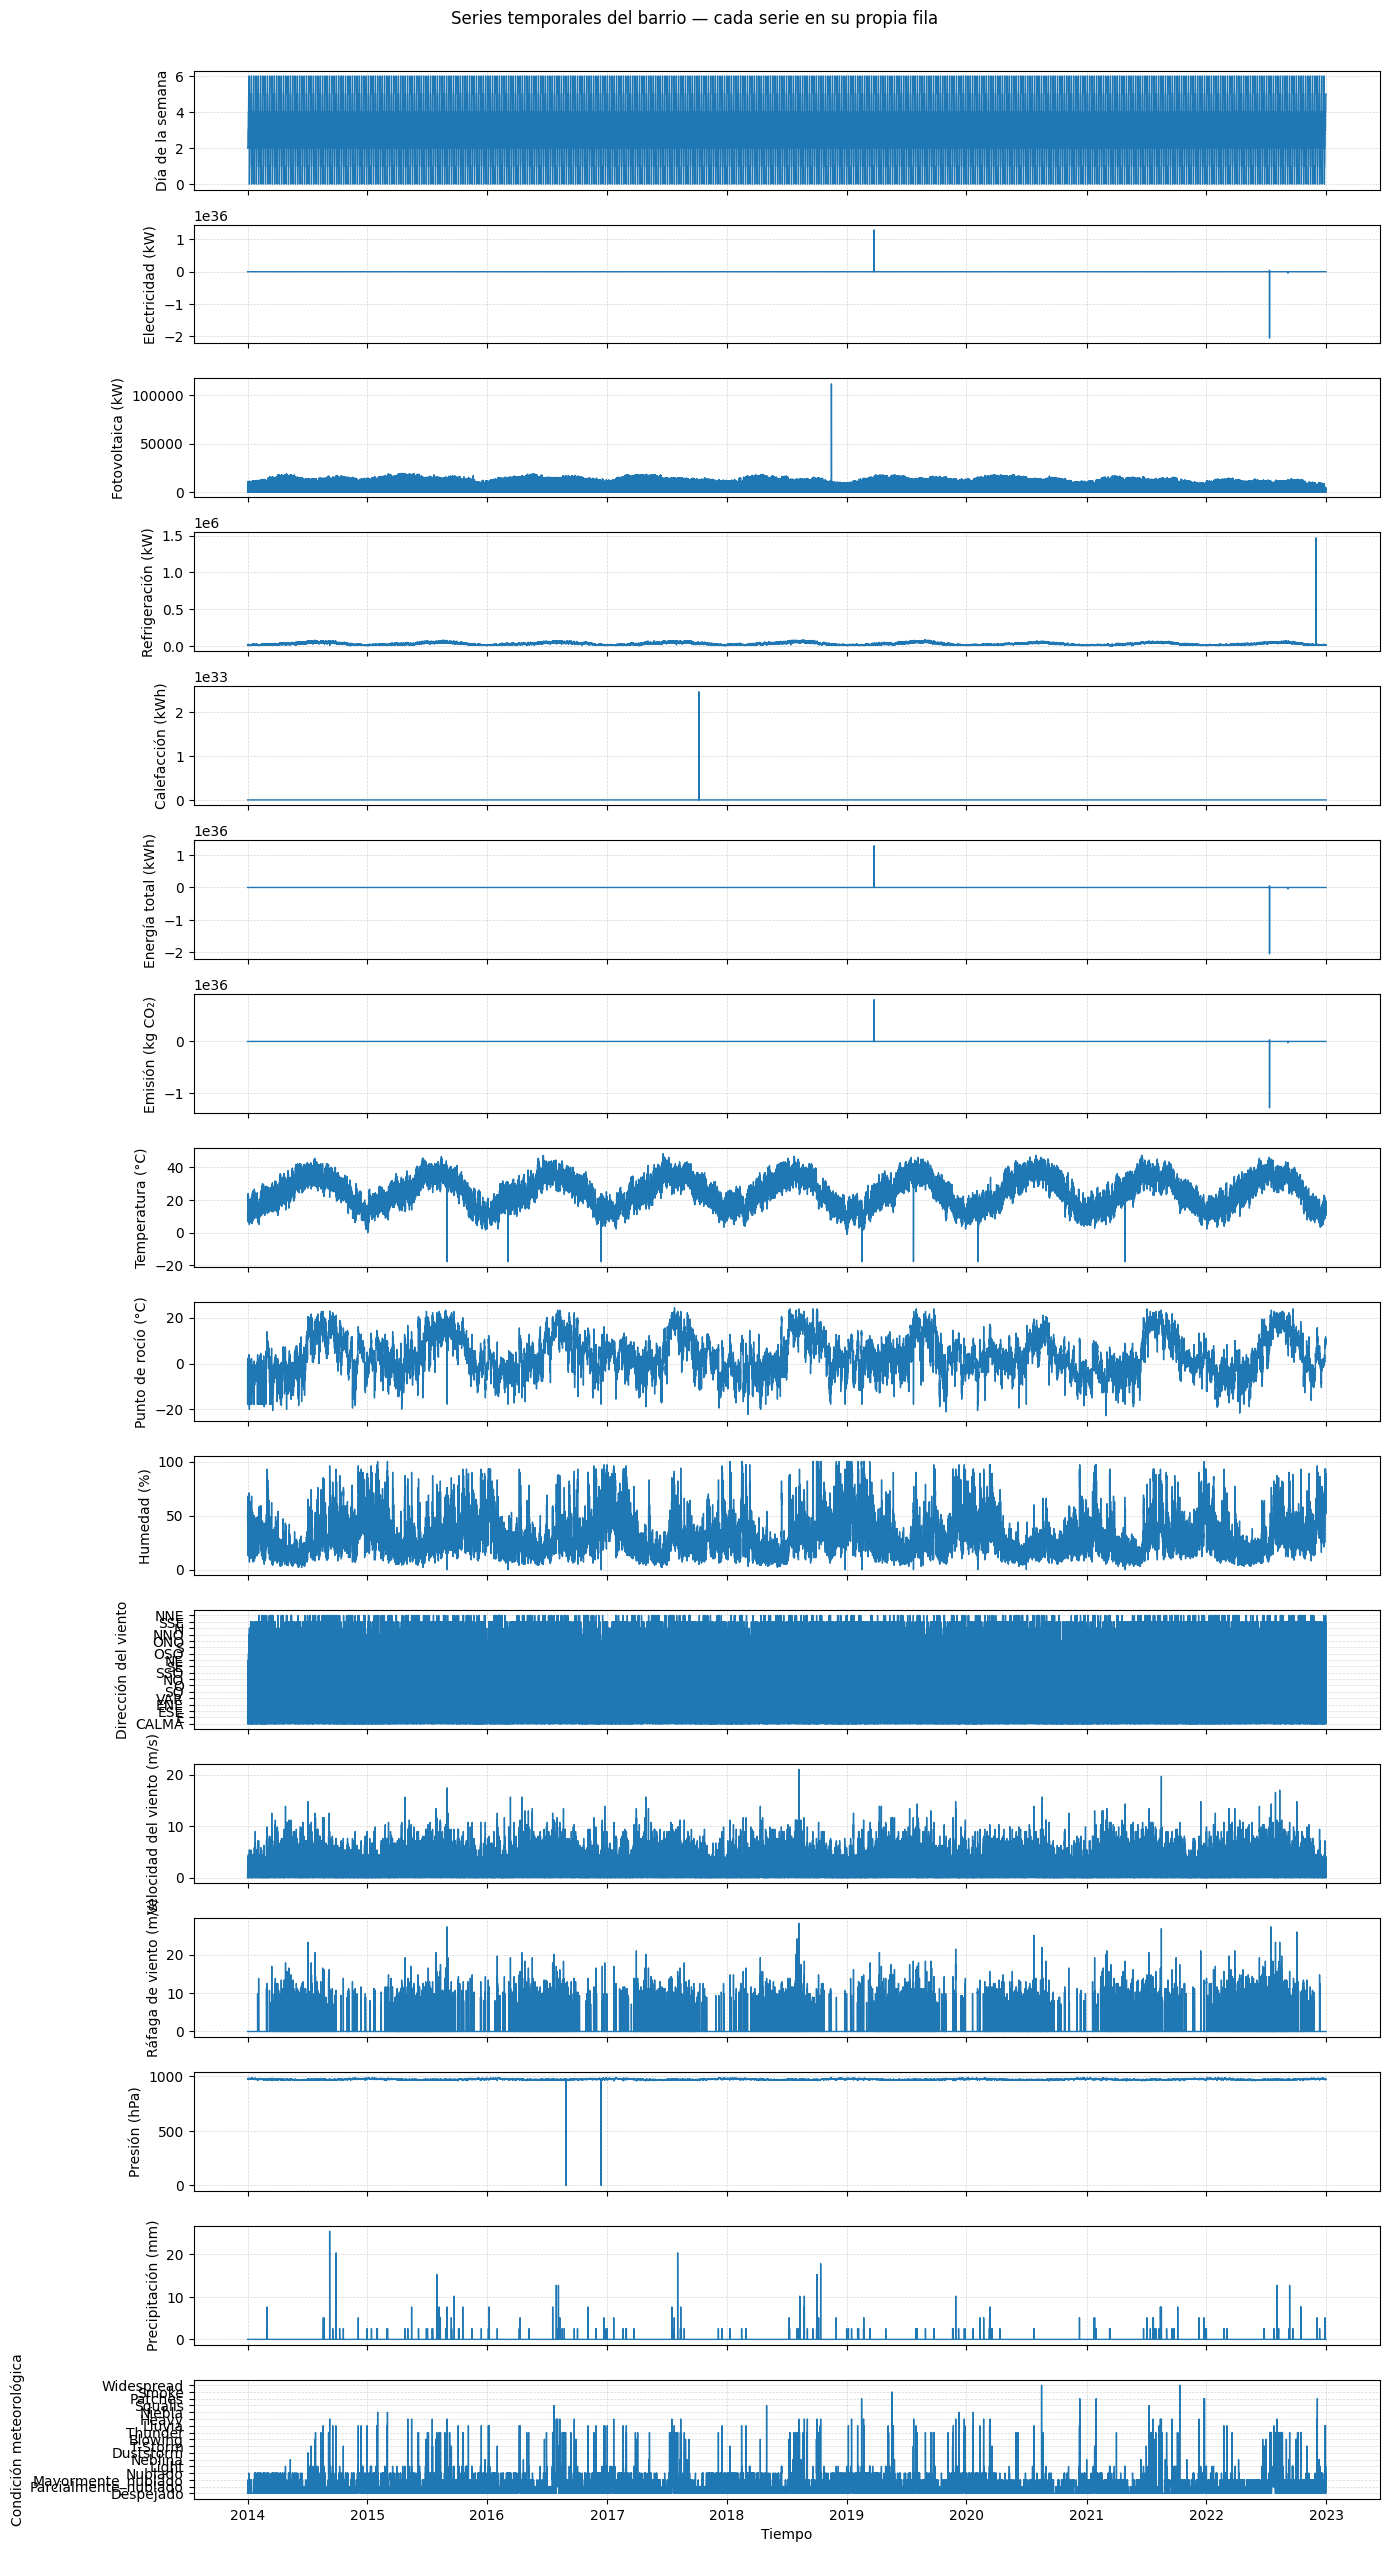

In [3880]:
# Guarda el número de variables del dataset
n = len(energia_climaticos.columns)
# Creamos las figuras y ejes con 1 columna que cada fila tendrá una variable, en figsize poniendo anchura y altura, comparten el mismo eje x
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(14, max(2, 1.6 * n)), sharex=True)
# Dibuja la serie temporal de cada columna, pone su nombre al eje y y coloca un grid
for ax, col in zip(axes, energia_climaticos.columns):
    ax.plot(energia_climaticos.index, energia_climaticos[col], linewidth=1)
    ax.set_ylabel(col)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Coloca en la última gráfica el eje X
axes[-1].set_xlabel("Tiempo")
# Nombre general
fig.suptitle("Series temporales del barrio — cada serie en su propia fila", y=0.995)
# Distancia entre filas
plt.tight_layout(rect=[0, 0, 1, 0.99])
# Se muestra la gráfica
plt.show()


Hablaremos de lo que vemos a simple vista, por lo tanto hablaremos de muchos números como estimación y no como valor exacto, pero suficiente para entender como funciona cada variable:

Electricidad (kW) se puede ver que tiene una escada de 1e36, hay una linea recta en 0 (alrededor), que luego en un punto sube a 1 de golpe, linea recta en 0, y otro punto que baja de golpe a -2, continua en 0, por lo que notamos que existen outliers tan exageradamente grandes que achatan todos los valores a 0. 

Fotovoltaica (kW) todos los datos estan entre 0 y 25000, y en un punto sube de golpe a 100000, luego continua entre 0 y 25000. Por lo tanto se nota los outliers.

Refrigeración (kW) hay como una linea que se ondula un poco, y sus datos estan entre 0 y 0.3, y en un punto sube a 1 de golpe, luego continua con la linea entre 0 y 0.3. Se nota los outliers.

Calefacción (kWh) linea recta en 0 hasta que sube de golpe a 2.5, luego continua en 0. Existen outliers.

Energía total (kWh) todo recto en 0, sube a 1 de golpe, sigue recto a 0, baja a -2 de golpe, continua en 0 en emision. Se nota la presencia de outliers.

Emisión (kg CO₂) todo recto en 0, sube a 0.5 de golpe, sigue recto a 0, baja a -1.3 de golpe, continua en 0. Existen outliers.

Temperatura (ºC) la temperatura suele estar entre 0 y 40 y pocos, con bajadas de golpe hacia alrededor de -15. Existen outliers. 

Punto de rocío (ºC) va entre alrededor de -20 a 23, en algunos puntos la variable actúa de forma extraña, dando bajones en zona muy altas, por lo que indica que también hay presencia de outliers.

Humedad (%) a simple vista no parece que haya ningún valor por debajo de 0 o mayor a 100, por lo que no consideramos que hayan outliers.

Dirección del viento, al ser una clasificación, no se nota la presencia de outliers. 

Velocidad del viento (m/s) va de 0 a 15 con picos de hasta 22 (alrededor) en algunos puntos, aunque hay picos muy altos, por el contexto de la variable consideramos que no existen outliers. 

Rafaga de viento (m/s) va desde 0 hasta 20, con picos de 23 o alrededor. Se considera que no hay outliers viendo el contexto de la variable.

Presion fija en 1000, con 2 bajones a 0. Por lo tanto existen outliers.

Precipitacion aunque suele estar en 0, tiene picos muy altos hasta de alrededor de 20 o más, pero leyendo el contexto de la variable, no consideramos que existan outliers.

Condicion meteorologica, como sucedia en direccion del viento al ser una variable de clasificación no contiene outliers.

Ahora vamos a analizar las variables de una en una, excepto las dos variables categóricas Dirección del viento y Condición meteorológica, además de lso días de la semana.

## Electricidad (kW)

Como hemos indicado anteriormente, en esta variable hay outliers tan enormes que visualmente parece que hay una linea en la grafica continua que esta en 0, vamos a revisar como estan distribuidos sus valores.

In [3881]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Electricidad (kW)'].describe())


count    7.888800e+04
mean    -3.529852e+31
std      1.127725e+34
min     -2.050000e+36
25%      2.168117e+04
50%      2.514908e+04
75%      2.915652e+04
max      1.290000e+36
Name: Electricidad (kW), dtype: float64


Podemos ver como hay datos con valores excesivamente altos y bajos que no tienen sentido en la variable, por lo tanto establecemos percentiles para solamente eliminar los datos excesivos.

In [ ]:
# establecemos los percentiles
cuartil_minimo = energia_climaticos['Electricidad (kW)'].quantile(0.003)
cuartil_maximo = energia_climaticos['Electricidad (kW)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia_climaticos['Electricidad (kW)'] = energia_climaticos['Electricidad (kW)'].where(
    (energia_climaticos['Electricidad (kW)'] >= cuartil_minimo) & (energia_climaticos['Electricidad (kW)'] <= cuartil_maximo)
)


Ajustamos para intentar eliminar únicamente los valores excesivos que vemos en el dataset. Comprobamos cuántos valores hemos eliminado.

In [3883]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana                0
Electricidad (kW)             316
Fotovoltaica (kW)               0
Refrigeración (kW)              0
Calefacción (kWh)               0
Energía total (kWh)             0
Emisión (kg CO₂)                0
Temperatura (°C)                0
Punto de rocío (°C)             0
Humedad (%)                     0
Dirección del viento            0
Velocidad del viento (m/s)      0
Ráfaga de viento (m/s)          0
Presión (hPa)                   0
Precipitación (mm)              0
Condición meteorológica         0
dtype: int64

hemos eliminado 316 valores, los cuáles constituye un ~0.4% del dataset, lo que debería ser una pequeña cantidad para eliminar los outliers.

Utilizamos el método que utilizemos para los nulos de antes con el interpolado temporal, haciendo que queden valores más lógicos.

In [3884]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos['Electricidad (kW)'] = energia_climaticos['Electricidad (kW)'].interpolate(method='time')

Aquí podemos ver cómo han quedado los datos después del interpolado temporal.

In [3885]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia_climaticos['Electricidad (kW)'].describe()

count    78888.000000
mean     25704.906056
std       5426.976963
min      14559.810000
25%      21681.755000
50%      25145.835000
75%      29146.885000
max      43837.690000
Name: Electricidad (kW), dtype: float64

Vemos como ha quedado la gráfica.

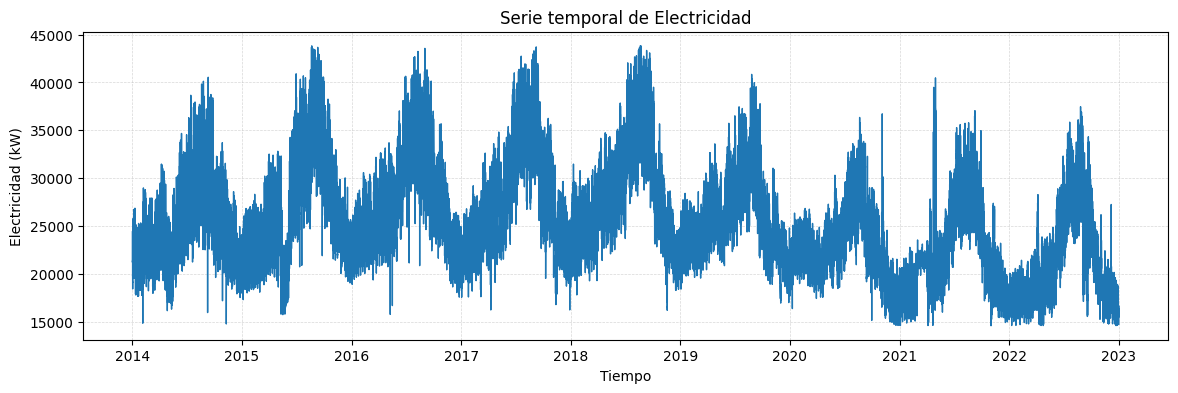

In [3888]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Electricidad (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Electricidad (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Electricidad')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como los valores parecen ir desde alrededor de 14000 a alrededor de 43000, valores más típicos para el contexto del problema, además de que se puede ver la representación de la gráfica sin valores aplastados.

## Fotovoltaica (kW)

Vamos a analizar la variable Fotovoltaica (kW)

In [3889]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Fotovoltaica (kW)'].describe())

count     78888.000000
mean       3967.804522
std        5310.102410
min           0.000000
25%           3.870000
50%         160.065000
75%        8393.112500
max      111938.620000
Name: Fotovoltaica (kW), dtype: float64


Se puede ver, cómo el mínimo es de 0, 25% 3.87, 50% 160.065, 75% 8393.1125 y max 111938.62, por lo que se ve lo que hemos visto en la gráfica, que hay outliers muy altos que debemos eliminar, para ello utilizaremos el mismo proceso que la anterior variable pero sin tener en cuenta el percentil inferior.

In [ ]:
# establecemos los percentiles
cuartil_maximo = energia_climaticos['Fotovoltaica (kW)'].quantile(0.9999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia_climaticos['Fotovoltaica (kW)'] = energia_climaticos['Fotovoltaica (kW)'].where((energia_climaticos['Fotovoltaica (kW)'] <= cuartil_maximo)
)


Una vez eliminado únicamente los outliers, revisamos cuántos outliers hemos eliminado.

In [3891]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana              0
Electricidad (kW)             0
Fotovoltaica (kW)             8
Refrigeración (kW)            0
Calefacción (kWh)             0
Energía total (kWh)           0
Emisión (kg CO₂)              0
Temperatura (°C)              0
Punto de rocío (°C)           0
Humedad (%)                   0
Dirección del viento          0
Velocidad del viento (m/s)    0
Ráfaga de viento (m/s)        0
Presión (hPa)                 0
Precipitación (mm)            0
Condición meteorológica       0
dtype: int64

Hemos eliminado 8 outliers. Ahora vamos a hacer un interpolado temporal para rellenar nulos siguiendo la distribución de la gráfica.

In [3892]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos['Fotovoltaica (kW)'] = energia_climaticos['Fotovoltaica (kW)'].interpolate(method='time')

Revisamos cómo han quedado los datos despés del interpolado temporal.

In [3893]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Fotovoltaica (kW)'].describe())

count    78888.000000
mean      3965.668666
std       5291.384048
min          0.000000
25%          3.870000
50%        160.065000
75%       8392.707500
max      19031.330000
Name: Fotovoltaica (kW), dtype: float64


Vemos como ya no queda nulos, y la variable parece tener valores más normales, entre 0 y 19031, ahora vamos a revisarlo con una gráfica.

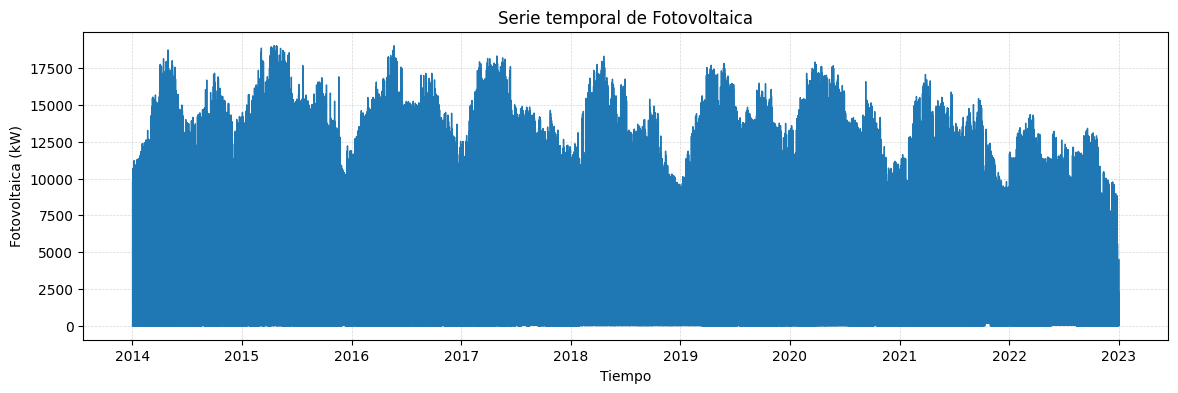

In [3894]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Fotovoltaica (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Fotovoltaica (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Fotovoltaica')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()

Se puede ver cómo si hubieramos hecho zoom a la gráfica que habíamos visto al principio pero sin los outliers, por lo tanto se ve como que todos los outliers han sido eliminados de forma definitiva.

## Refrigeración (kW)

Analizamos la variable refrigeración

In [3895]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Refrigeración (kW)'].describe())

count    7.888800e+04
mean     2.951746e+04
std      1.725601e+04
min      0.000000e+00
25%      1.548496e+04
50%      2.629096e+04
75%      4.133916e+04
max      1.468215e+06
Name: Refrigeración (kW), dtype: float64


Aquí se puede ver, una vez más, que el valor máximo es un número mucho más grande que el resto de valores, indicando que hay outliers hacia arriba, por lo tanto aplicaremos la misma metodología de la variable anterior.

Para ello eliminaremos (sustituidos por nulos) todos los datos que esten por encima del percentil que esblacemos, para deshacernos de los outliers.

In [ ]:
# establecemos los percentiles
cuartil_maximo = energia_climaticos['Refrigeración (kW)'].quantile(0.9999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia_climaticos['Refrigeración (kW)'] = energia_climaticos['Refrigeración (kW)'].where((energia_climaticos['Refrigeración (kW)'] <= cuartil_maximo)
)


Comprobamos cuántos nulos tiene nuestro dataset al eliminar los outliers.

In [3897]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana              0
Electricidad (kW)             0
Fotovoltaica (kW)             0
Refrigeración (kW)            8
Calefacción (kWh)             0
Energía total (kWh)           0
Emisión (kg CO₂)              0
Temperatura (°C)              0
Punto de rocío (°C)           0
Humedad (%)                   0
Dirección del viento          0
Velocidad del viento (m/s)    0
Ráfaga de viento (m/s)        0
Presión (hPa)                 0
Precipitación (mm)            0
Condición meteorológica       0
dtype: int64

Se ve cómo hemos eliminado 8 outliers, ahora realizaremos la imputacion por interpolación temporal, como hicimos en la variable anterior.

In [3898]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos['Refrigeración (kW)'] = energia_climaticos['Refrigeración (kW)'].interpolate(method='time')

Ahora comprobamos como ha quedado nuestra variable.

In [3899]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Refrigeración (kW)'].describe())

count    78888.000000
mean     29491.587231
std      16349.567109
min          0.000000
25%      15484.964130
50%      26290.507005
75%      41338.870755
max      80437.553190
Name: Refrigeración (kW), dtype: float64


Se puede ver cómo todos los nulos han sido sustituidos por los valores de interpolación temporal (tenemos 7888 valores no nulos) y como el valor máximo es un valor más lógico con el del dataset.

Ahora revisaremos como se ve en la gráfica.

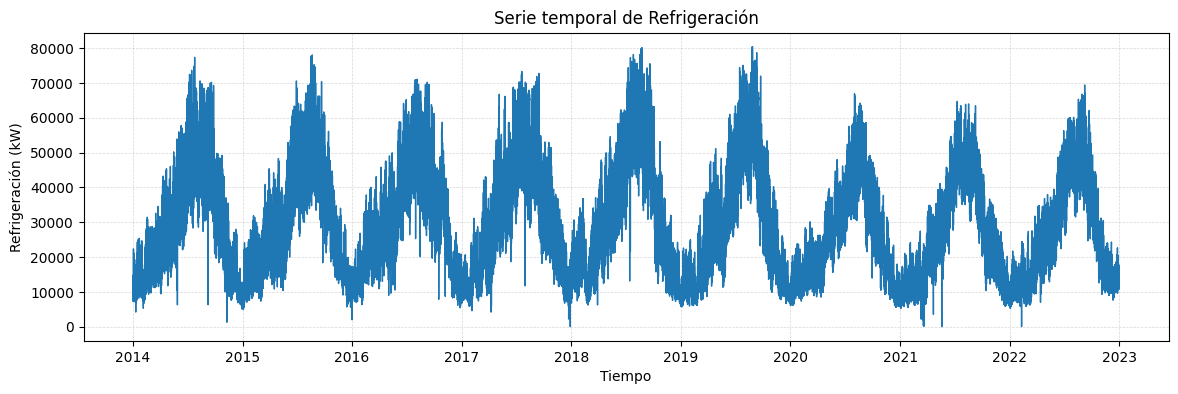

In [3900]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Refrigeración (kW)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Refrigeración (kW)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Refrigeración')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()

se puede ver como hay algunas bajadas sospechosas en la gráfica, pero no lo vemos lo suficientemente graves para tener que tratarlas.

## Calefacción (kWh)

Analizamos la variable Calefacción

In [3901]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Calefacción (kWh)'].describe())

count    7.888800e+04
mean     3.135633e+28
std      8.806631e+30
min     -2.930710e+00
25%      1.462424e+03
50%      1.828763e+03
75%      2.617124e+03
max      2.473519e+33
Name: Calefacción (kWh), dtype: float64


Podemos ver cómo el valor maximo es demasiado alto e irreal, y el número mínimo es negativo cuando no tiene sentido en el contecto del problema, por lo que procedemos a eliminarlos, con el método de los percentiles, tanto superior como inferior.

In [ ]:
# establecemos los percentiles
cuartil_minimo = energia_climaticos['Calefacción (kWh)'].quantile(0.0001)
cuartil_maximo = energia_climaticos['Calefacción (kWh)'].quantile(0.999)

# Conservamos únicamente los datos en los cuales hemos establecido los límites
energia_climaticos['Calefacción (kWh)'] = energia_climaticos['Calefacción (kWh)'].where(
    (energia_climaticos['Calefacción (kWh)'] >= cuartil_minimo) & (energia_climaticos['Calefacción (kWh)'] <= cuartil_maximo)
)


Ahora revisaremos la cantidad de outliers que hemos eliminado.

In [3903]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana               0
Electricidad (kW)              0
Fotovoltaica (kW)              0
Refrigeración (kW)             0
Calefacción (kWh)             85
Energía total (kWh)            0
Emisión (kg CO₂)               0
Temperatura (°C)               0
Punto de rocío (°C)            0
Humedad (%)                    0
Dirección del viento           0
Velocidad del viento (m/s)     0
Ráfaga de viento (m/s)         0
Presión (hPa)                  0
Precipitación (mm)             0
Condición meteorológica        0
dtype: int64

Se ve que hemos eliminado únicamente 85 outliers, para rellenar nulos utilizaremos la interpolación temporal.

In [3904]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos['Calefacción (kWh)'] = energia_climaticos['Calefacción (kWh)'].interpolate(method='time')

Ahora veremos como ha quedado el dataset después del interpolado temporal.

In [3905]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia_climaticos['Calefacción (kWh)'].describe()

count    78888.000000
mean      2162.803128
std       1038.985587
min          0.000000
25%       1462.424290
50%       1828.763040
75%       2614.193320
max       8370.107760
Name: Calefacción (kWh), dtype: float64

Podemos ver cómo ya no quedan nulos y como todos los valores parecen aceptables, ahora revisaremos la gráfica.

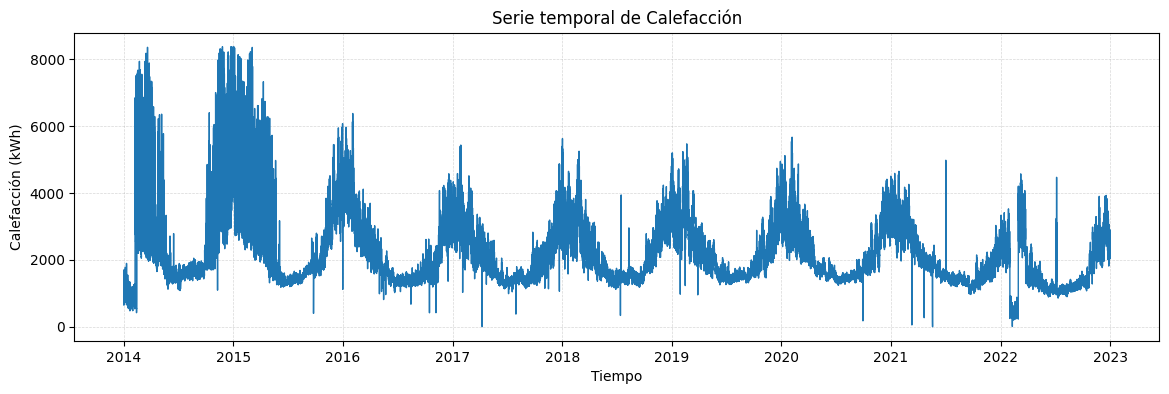

In [3908]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Calefacción (kWh)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Calefacción (kWh)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Calefacción')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Se puede ver cómo la gráfica muestra un comportamiento correcto.

## Energía total (kWh)

Vamos a analizar la variable Energía total.

In [3909]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Energía total (kWh)'].describe())

count    7.888800e+04
mean    -3.528571e+31
std      1.127948e+34
min     -2.051497e+36
25%      4.058154e+04
50%      5.309860e+04
75%      7.177089e+04
max      1.289512e+36
Name: Energía total (kWh), dtype: float64


Como podemos ver en el enunciado de la práctica, "Energía total (kWh)" es la suma total de las variables "Electricidad (kW)", "Refrigeración (kW)" y "Calefacción (kWh)", por lo que trataremos los outliers con la suma de estas 3 variables.

In [ ]:
# Suma de variables por filas
energia_climaticos['Energía total (kWh)'] = (
    energia_climaticos['Electricidad (kW)'] +
    energia_climaticos['Refrigeración (kW)'] +
    energia_climaticos['Calefacción (kWh)']
)

Una vez calculada, comprobaremos como ha quedado nuestra variable.

In [3914]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia_climaticos['Energía total (kWh)'].describe()

count     78888.000000
mean      57359.296416
std       20445.364695
min       17624.088000
25%       40587.175845
50%       53075.334005
75%       71717.465835
max      125635.475740
Name: Energía total (kWh), dtype: float64

Vemos cómo nuestro dataset ya contiene valores aceptables. Ahora veremos su representación de su serie temporal en una gráfica.

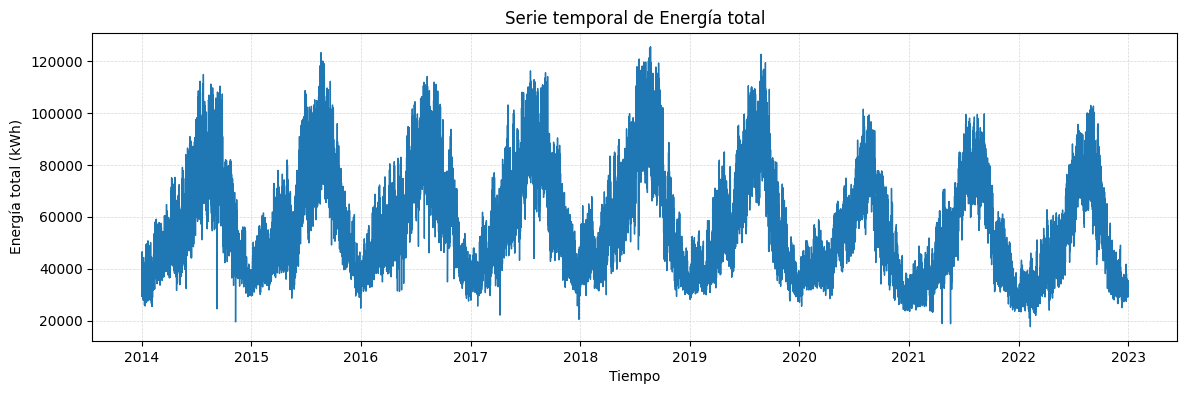

In [3917]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Energía total (kWh)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Energía total (kWh)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Energía total')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como la gráfica parece funcionar de manera correcta.

## Emisión (kg CO₂)

Vamos a analizar como funciona la variable.

In [3918]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Emisión (kg CO₂)'].describe())

count    7.888800e+04
mean    -2.197952e+31
std      7.032121e+33
min     -1.280000e+36
25%      2.531000e+04
50%      3.311500e+04
75%      4.476000e+04
max      8.050000e+35
Name: Emisión (kg CO₂), dtype: float64


Aquí vemos como hay outliers por debajo y por arriba, puesto que por arriba del 75% llega a cantidades absurdas, y por debajo del 25% hay hasta números negativos. Por lo tanto, empezaremos a eliminar outliers por cuartiles.

In [3919]:
# establecemos los cuartiles 25% y 75%
cuartil_minimo = energia_climaticos['Emisión (kg CO₂)'].quantile(0.25)
cuartil_maximo = energia_climaticos['Emisión (kg CO₂)'].quantile(0.75)

# Sustituimos los valores encima del 75% y por debajo del 25% por nulos
energia_climaticos['Emisión (kg CO₂)'] = energia_climaticos['Emisión (kg CO₂)'].where(
    (energia_climaticos['Emisión (kg CO₂)'] >= cuartil_minimo) & (energia_climaticos['Emisión (kg CO₂)'] <= cuartil_maximo)
)

Comprobamos la cantidad de outliers detectados y eliminados.

In [3920]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana                  0
Electricidad (kW)                 0
Fotovoltaica (kW)                 0
Refrigeración (kW)                0
Calefacción (kWh)                 0
Energía total (kWh)               0
Emisión (kg CO₂)              39419
Temperatura (°C)                  0
Punto de rocío (°C)               0
Humedad (%)                       0
Dirección del viento              0
Velocidad del viento (m/s)        0
Ráfaga de viento (m/s)            0
Presión (hPa)                     0
Precipitación (mm)                0
Condición meteorológica           0
dtype: int64

Se puede ver como prácticamente la mitad del dataset son outliers. Ahora procederemos a la imputación por interpolación temporal.

In [3921]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos['Emisión (kg CO₂)'] = energia_climaticos['Emisión (kg CO₂)'].interpolate(method='time')

In [3922]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia_climaticos['Emisión (kg CO₂)'].describe()

count    78853.000000
mean     34214.948575
std       7393.410578
min      25310.000000
25%      26345.714286
50%      33120.000000
75%      42693.076923
max      44760.000000
Name: Emisión (kg CO₂), dtype: float64

Faltan 35 nulos que vamos a completar con `ffill()` y `bfill()`.

In [3923]:
# Rellenamos las columnas con el valor anterior y posterior (ffill y bfill respectivamente)
energia_climaticos['Emisión (kg CO₂)'] = energia_climaticos['Emisión (kg CO₂)'].ffill().bfill()

Ahora comprobaremos qué no hayan nulos.

In [3924]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia_climaticos['Emisión (kg CO₂)'].describe()

count    78888.000000
mean     34211.614441
std       7393.464192
min      25310.000000
25%      26347.644231
50%      33120.000000
75%      42690.000000
max      44760.000000
Name: Emisión (kg CO₂), dtype: float64

Vemos cómo no hay nulos y sus datos tienen valores lógicos con el resto de valores de la variable. Ahora veremos su representación temporal en una gráfica.

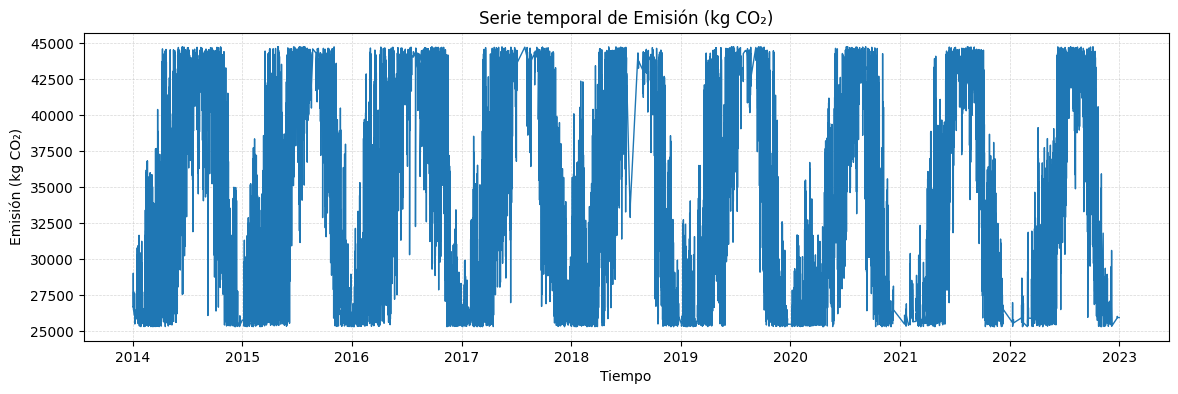

In [3925]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Emisión (kg CO₂)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Emisión (kg CO₂)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Emisión (kg CO₂)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos como la gráfica por lo general funciona bastante bien.

## Temperatura (°C)

Vamos a analizar la variable.

In [3926]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Temperatura (°C)'].describe())

count    78888.000000
mean        24.785825
std          9.512069
min        -17.777778
25%         17.222222
50%         25.000000
75%         32.222222
max         48.333333
Name: Temperatura (°C), dtype: float64


Aquí parece ser normal, puesto que hayan temperaturas entre -18ºC y 49ºC podrían ser normales. Por lo tanto, para esta variable, analizaremos los outliers desde su gráfica.

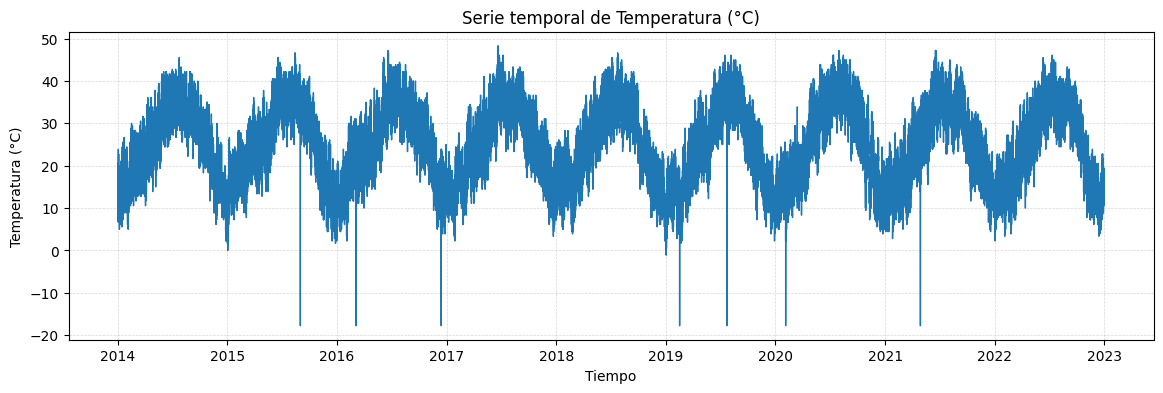

In [3927]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se destacan bastante los outliers, puesto que la forma de la gráfica no suele bajar demasiado de 0 o incluso parece que -1ºC, por lo tanto solo detectaremos los valores que tengan menos de -10ºC, puesto que son picos muy notorios hacia abajo, por lo tanto esta temperatura no tiene sentido en la zona donde analiza el dataset del problema.

In [3928]:
# Elimina todos los valores por debajo de -10ºC
energia_climaticos['Temperatura (°C)'] = energia_climaticos['Temperatura (°C)'].where((energia_climaticos['Temperatura (°C)'] >= -10)
)

Comprobamos cuántos outliers hemos eliminado.

In [3929]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana               0
Electricidad (kW)              0
Fotovoltaica (kW)              0
Refrigeración (kW)             0
Calefacción (kWh)              0
Energía total (kWh)            0
Emisión (kg CO₂)               0
Temperatura (°C)              15
Punto de rocío (°C)            0
Humedad (%)                    0
Dirección del viento           0
Velocidad del viento (m/s)     0
Ráfaga de viento (m/s)         0
Presión (hPa)                  0
Precipitación (mm)             0
Condición meteorológica        0
dtype: int64

Vemos cómo hemos eliminado 15 outliers, vamos a imputar con intepolación temporal

In [3930]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos['Temperatura (°C)'] = energia_climaticos['Temperatura (°C)'].interpolate(method='time')

Vemos cómo queda el dataset.

In [3931]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia_climaticos['Temperatura (°C)'].describe()

count    78888.000000
mean        24.793688
std          9.494418
min         -1.111111
25%         17.222222
50%         25.000000
75%         32.222222
max         48.333333
Name: Temperatura (°C), dtype: float64

Hemos imputados todos los nulos y sus valores parecen haber quedado bien. Vamos a revisar de nuevo la gráfica de su serie temporal.

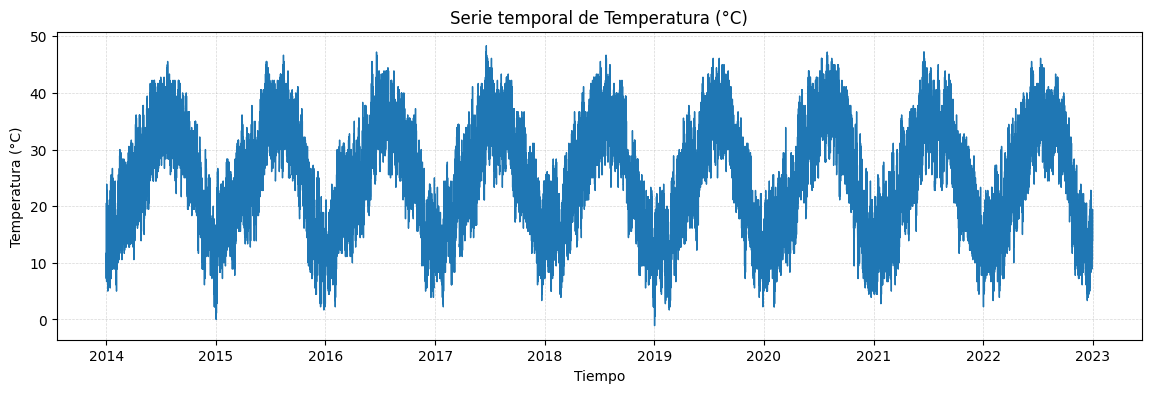

In [3932]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Temperatura (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Temperatura (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Temperatura (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos cómo efectivamente, ya no hay valores que resalten hacia abajo, por lo que hemos tratado con los outliers de forma adecuada.

## Punto de rocío (°C)

Vamos a analizar esta variable.

In [3933]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Punto de rocío (°C)'].describe())

count    78888.000000
mean         3.794071
std          8.246256
min        -22.777778
25%         -2.222222
50%          2.777778
75%         10.000000
max         24.444444
Name: Punto de rocío (°C), dtype: float64


Vemos, al igual que paso con la anterior variable, los valores de esta variable parecen normales, vamos a analizar la gráfica.

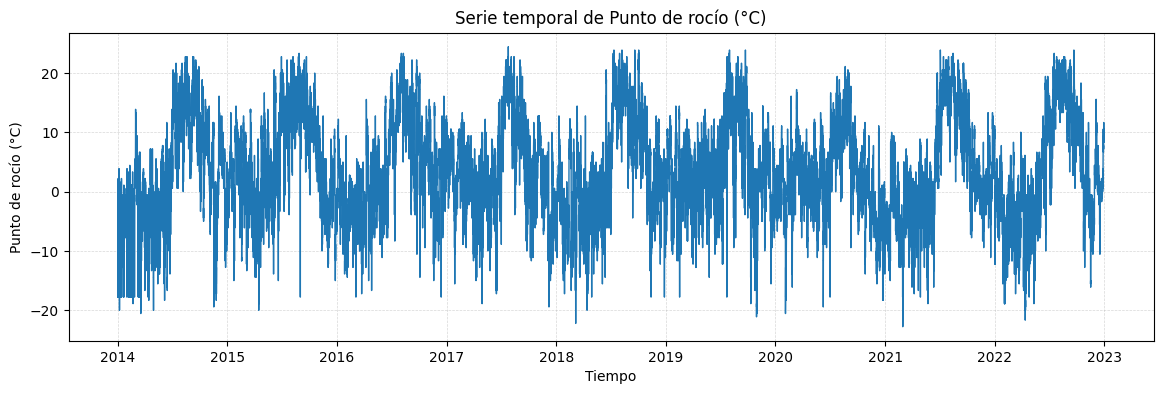

In [3934]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Punto de rocío (°C)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Punto de rocío (°C)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Punto de rocío (°C)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos que aunque haya algun bajon, parece que es el funcionamiento típico de la variable, por lo tanto lo identificamos como que esta variable no contiene outliers.

## Humedad (%)

Vamos a analizar esta variable.

In [3935]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Humedad (%)'].describe())

count    78888.000000
mean        31.297536
std         19.549718
min          0.000000
25%         17.000000
50%         27.000000
75%         41.000000
max        100.000000
Name: Humedad (%), dtype: float64


Vemos que los valores de humedad de forma porcentual son lógicos, por lo que vamos a visualizar la gráfica de su serie temporal.

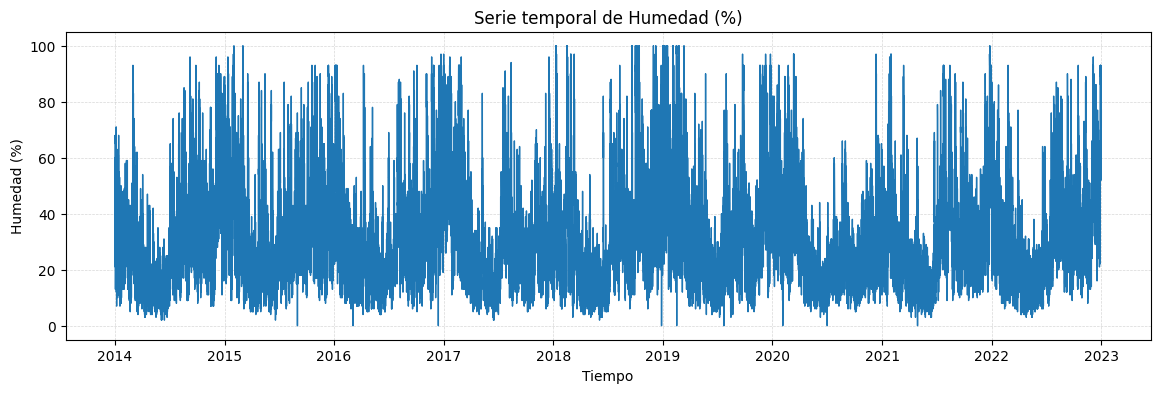

In [3936]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Humedad (%)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Humedad (%)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Humedad (%)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Vemos en su serie tempora, cómo aquí parece que tampoco hay outliers, ya que no se ve un funcionamiento raro en ningún lado.

## Velocidad del viento (m/s)

Vamos a analizar esta variable.

In [3937]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Velocidad del viento (m/s)'].describe())

count    78888.000000
mean         2.884915
std          1.964542
min          0.000000
25%          1.341120
50%          2.682240
75%          3.576320
max         21.010880
Name: Velocidad del viento (m/s), dtype: float64


Se puede ver, que aunque por encima del 75% se dispara, no parece valores exagerados, por lo que vamos a analizar su serie temporal en la gráfica.

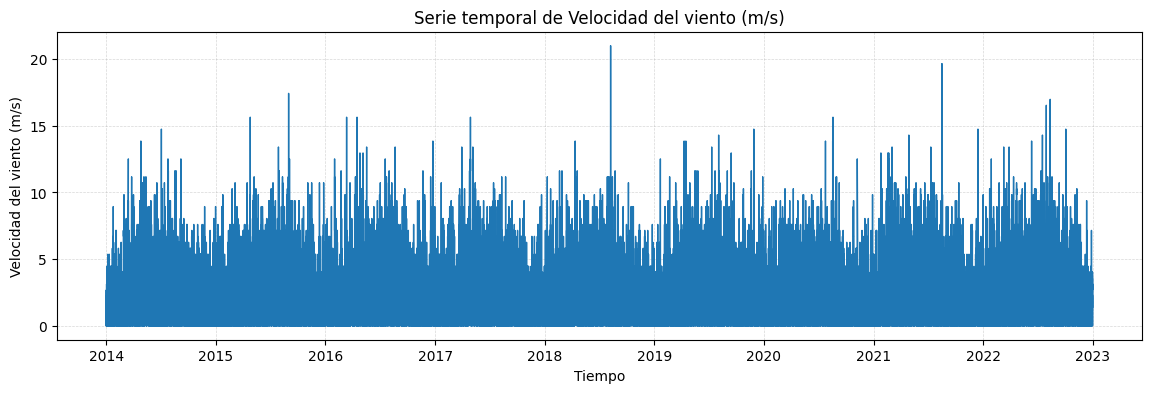

In [3938]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Velocidad del viento (m/s)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Velocidad del viento (m/s)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Velocidad del viento (m/s)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se ve qué aunque hay subidas muy altas de viento, puede ser lógicas debido a borrascas, rachas de viento entre otras cosas (contexto de la variable) por lo que consideramos que no contiene outliers.

## Ráfaga de viento (m/s)

Vamos a analizar esta variable.

In [3939]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Ráfaga de viento (m/s)'].describe())

count    78888.000000
mean         0.650483
std          2.574001
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         28.163520
Name: Ráfaga de viento (m/s), dtype: float64


Puesto que la propia variable indica que son ráfagas, se puede ver como gran parte de los valores están situados en 0 y hay un valor máximo dentro de la lógica del contexto de la variable, por lo que no parecen haber outliers, vamos a analizar su serie temporal en una gráfica.

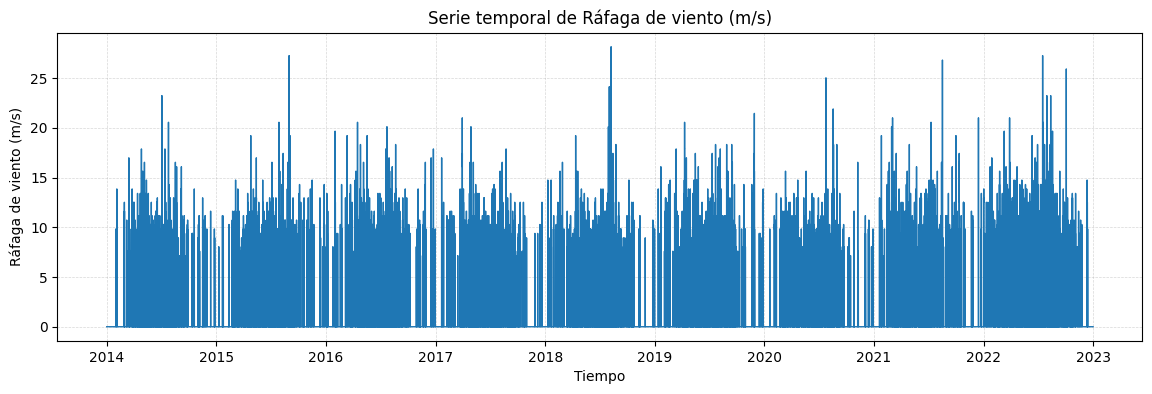

In [3940]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Ráfaga de viento (m/s)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Ráfaga de viento (m/s)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Ráfaga de viento (m/s)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Cómo hemos descrito antes, al ser ráfagas, los valores estaran en 0 y habrán picos hacia arriba, que encima no son exagerados, por lo tanto lo consideramos normales dentro del contexto de la variable y decidimos no eliminar nada, puesto que no vemos outliers.

## Presión (hPa)

Vamos a analizar la variable.

In [3941]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Presión (hPa)'].describe())

count    78888.000000
mean       972.419750
std          7.531601
min          0.000000
25%        969.184818
50%        971.893930
75%        975.280320
max        991.534992
Name: Presión (hPa), dtype: float64


Por lo tanto decidimos eliminar únicamente las variables que bajen de 900 (hPa) de presión

In [3942]:
# Sustituimos los valores encima del 75% por nulos
energia_climaticos['Presión (hPa)'] = energia_climaticos['Presión (hPa)'].where((energia_climaticos['Presión (hPa)'] >= 900)
)

Revisamos cuántos outliers hemos eliminado.

In [3943]:
# Visualizamos la cantidad de nulos que tiene el dataset
energia_climaticos.isna().sum()

Día de la semana              0
Electricidad (kW)             0
Fotovoltaica (kW)             0
Refrigeración (kW)            0
Calefacción (kWh)             0
Energía total (kWh)           0
Emisión (kg CO₂)              0
Temperatura (°C)              0
Punto de rocío (°C)           0
Humedad (%)                   0
Dirección del viento          0
Velocidad del viento (m/s)    0
Ráfaga de viento (m/s)        0
Presión (hPa)                 3
Precipitación (mm)            0
Condición meteorológica       0
dtype: int64

Vemos como hemos eliminado 3 outliers. Ahora imputaremos a través de interpolación temporal.

In [3944]:
# Utilizamos interpolación temporal en el dataset en las columnas seleccionadas
energia_climaticos['Presión (hPa)'] = energia_climaticos['Presión (hPa)'].interpolate(method='time')

Revisamos de nuevo la variable.

In [3945]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
energia_climaticos['Presión (hPa)'].describe()

count    78888.000000
mean       972.456865
std          4.556768
min        957.332453
25%        969.184818
50%        971.893930
75%        975.280320
max        991.534992
Name: Presión (hPa), dtype: float64

Se puede ver como ya no existen nulos ni valores extraños.

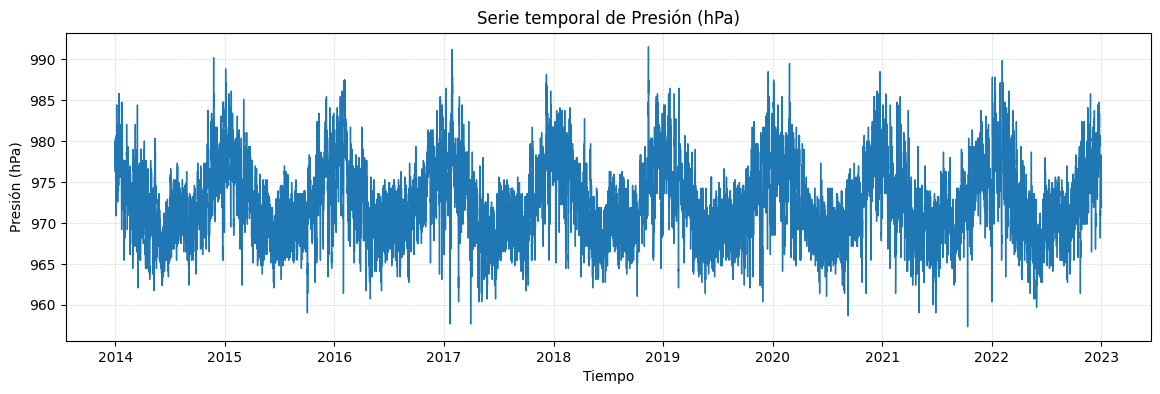

In [3946]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Presión (hPa)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Presión (hPa)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Presión (hPa)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Se puede ver en la gráfica como ya se muestra la serie temporal de la variable sin problemas.

## Precipitación (mm)

Vamos a analizar esta variable.

In [3947]:
# Visualizamos minimo, maximo, media, desviación típica, 25%, 50%, 75% y el número de valores que tiene la variable
print(energia_climaticos['Precipitación (mm)'].describe())

count    78888.000000
mean         0.017226
std          0.331767
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.400000
Name: Precipitación (mm), dtype: float64


Se puede ver cómo gran parte de los valores están en 0, rasgo característico de zonas muy poco lluviosas, por lo que los valores que están fuera de ellos son valores normales de que hay precipitación por lo tanto no lo consideramos outliers. Ahora vamos a revisar su serie temporal en la gráfica.

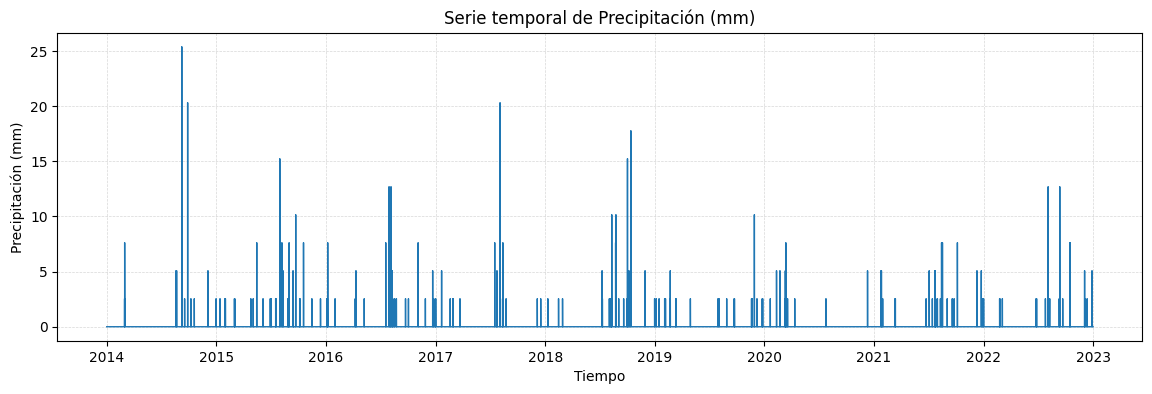

In [3948]:
# Creamos la gráfica de anchura 14, altura 4
fig, ax = plt.subplots(figsize=(14, 4))
# Pasamos las columnas que queremos representar
ax.plot(energia_climaticos.index, energia_climaticos['Precipitación (mm)'], linewidth=1)
# Nombre de la columna en el eje y
ax.set_ylabel('Precipitación (mm)')
# Nombre de la columna en el eje x
ax.set_xlabel('Tiempo')
# Nombre de la grafica
ax.set_title('Serie temporal de Precipitación (mm)')
# Grid de la gráfica
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
# Imprime la gráfica
plt.show()


Aquí se puede ver cómo efectivamente, su serie temporal demuestra el tiempo donde ha habido lluvia con precipitaciones dentro de valores razonables, por lo tanto no consideramos que esta variable tenga outliers.

# Transformación de variables categóricas a numéricas

In [3949]:
#Seleccionamos las columnas categóricas y las mostramos
categoricas = energia_climaticos.select_dtypes(include = ["object"]).columns
categoricas

Index(['Dirección del viento', 'Condición meteorológica'], dtype='object')

In [3950]:
#Transformamos las categóricas a dummies, eliminando la primera columna de cada variable categórica, haciendo que desaparezca la colinealidad, combinación lineal de varias columnas para formar otra.
categoricas_Datos = pd.get_dummies(energia_climaticos[categoricas], drop_first = True)
# Mostramos la transformación de las variables categóricas en variables dummies
categoricas_Datos.head()

,Dirección del viento_E,Dirección del viento_ENE,Dirección del viento_ESE,Dirección del viento_N,Dirección del viento_NE,Dirección del viento_NNE,Dirección del viento_NNO,Dirección del viento_NO,Dirección del viento_O,Dirección del viento_ONO,...,Condición meteorológica_Neblina,Condición meteorológica_Niebla,Condición meteorológica_Nublado,Condición meteorológica_Parcialmente_nublado,Condición meteorológica_Patches,Condición meteorológica_Smoke,Condición meteorológica_Squalls,Condición meteorológica_T-Storm,Condición meteorológica_Thunder,Condición meteorológica_Widespread
2014-01-01 00:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 01:00:00,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 02:00:00,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 03:00:00,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 04:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3951]:
# Eliminamos los atributos originales
energia_climaticos.drop(categoricas, axis = 1, inplace = True)
# Concatenamos los nuevos atributos creados para las variables categóricas
energia_climaticos = pd.concat([energia_climaticos, categoricas_Datos], axis = 1)
# Mostramos como quedan los datos de nuevo
energia_climaticos.head()

,Día de la semana,Electricidad (kW),Fotovoltaica (kW),Refrigeración (kW),Calefacción (kWh),Energía total (kWh),Emisión (kg CO₂),Temperatura (°C),Punto de rocío (°C),Humedad (%),...,Condición meteorológica_Neblina,Condición meteorológica_Niebla,Condición meteorológica_Nublado,Condición meteorológica_Parcialmente_nublado,Condición meteorológica_Patches,Condición meteorológica_Smoke,Condición meteorológica_Squalls,Condición meteorológica_T-Storm,Condición meteorológica_Thunder,Condición meteorológica_Widespread
2014-01-01 00:00:00,2,21294.33,2.39,8098.10352,876.28229,30268.71581,26700.0,11.666667,-17.777778,45.0,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 01:00:00,2,21190.46,1.95,7312.22987,873.35158,29376.04145,26700.0,10.555556,0.555556,50.0,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 02:00:00,2,21537.07,4.29,7305.86410,911.45081,29754.38491,26700.0,10.000000,-17.777778,50.0,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 03:00:00,2,21688.66,9.65,7573.82433,870.42087,30132.90520,26700.0,9.444444,-17.777778,52.0,...,False,False,False,False,False,False,False,False,False,False
2014-01-01 04:00:00,2,23044.40,10.19,7462.96849,946.61933,31453.98782,26700.0,9.444444,-17.777778,52.0,...,False,False,False,False,False,False,False,False,False,False


# Tabla de correlación

In [3952]:
# Calcular varianza de todas las columnas numéricas
varianza = energia_climaticos.var()

# Filtrar solo las que sean muy pequeñas (por ejemplo menor que 0.01)
bajas = varianza[varianza < 0.01]
columnas_bajas = varianza[varianza < 0.01].index
print(bajas)


Dirección del viento_NNE              0.009243
Condición meteorológica_Duststorm     0.000038
Condición meteorológica_Heavy         0.000507
Condición meteorológica_Light         0.009976
Condición meteorológica_Lluvia        0.001127
Condición meteorológica_Neblina       0.000342
Condición meteorológica_Niebla        0.000165
Condición meteorológica_Patches       0.000241
Condición meteorológica_Smoke         0.000025
Condición meteorológica_Squalls       0.000038
Condición meteorológica_T-Storm       0.000570
Condición meteorológica_Thunder       0.001822
Condición meteorológica_Widespread    0.000063
dtype: float64


In [3953]:
# Eliminamos los atributos originales
energia_climaticos.drop(columnas_bajas, axis = 1, inplace = True)
# Mostramos como quedan los datos de nuevo
energia_climaticos.head()

,Día de la semana,Electricidad (kW),Fotovoltaica (kW),Refrigeración (kW),Calefacción (kWh),Energía total (kWh),Emisión (kg CO₂),Temperatura (°C),Punto de rocío (°C),Humedad (%),...,Dirección del viento_S,Dirección del viento_SE,Dirección del viento_SO,Dirección del viento_SSE,Dirección del viento_SSO,Dirección del viento_VAR,Condición meteorológica_Despejado,Condición meteorológica_Mayormente_nublado,Condición meteorológica_Nublado,Condición meteorológica_Parcialmente_nublado
2014-01-01 00:00:00,2,21294.33,2.39,8098.10352,876.28229,30268.71581,26700.0,11.666667,-17.777778,45.0,...,False,False,False,False,False,False,True,False,False,False
2014-01-01 01:00:00,2,21190.46,1.95,7312.22987,873.35158,29376.04145,26700.0,10.555556,0.555556,50.0,...,False,False,False,False,False,False,True,False,False,False
2014-01-01 02:00:00,2,21537.07,4.29,7305.86410,911.45081,29754.38491,26700.0,10.000000,-17.777778,50.0,...,False,False,False,False,False,False,True,False,False,False
2014-01-01 03:00:00,2,21688.66,9.65,7573.82433,870.42087,30132.90520,26700.0,9.444444,-17.777778,52.0,...,False,False,False,False,False,False,True,False,False,False
2014-01-01 04:00:00,2,23044.40,10.19,7462.96849,946.61933,31453.98782,26700.0,9.444444,-17.777778,52.0,...,False,False,False,False,False,False,True,False,False,False


In [3954]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = energia_climaticos.corr()
# Visualizaremos de mayor a menor
matriz_correlacion["Energía total (kWh)"].sort_values(ascending=False)

Energía total (kWh)                             1.000000
Refrigeración (kW)                              0.985778
Emisión (kg CO₂)                                0.917900
Electricidad (kW)                               0.899211
Temperatura (°C)                                0.843354
Punto de rocío (°C)                             0.564682
Fotovoltaica (kW)                               0.347315
Velocidad del viento (m/s)                      0.178098
Dirección del viento_VAR                        0.150500
Ráfaga de viento (m/s)                          0.127894
Condición meteorológica_Parcialmente_nublado    0.105125
Dirección del viento_O                          0.087890
Dirección del viento_ONO                        0.069651
Dirección del viento_S                          0.065893
Dirección del viento_SSE                        0.058750
Condición meteorológica_Mayormente_nublado      0.044424
Dirección del viento_NO                         0.041333
Dirección del viento_NNO       

In [3955]:
# Hacemos una matriz de correlación y visualizaremos sobre nuestra columna objetivo cuáles columnas parecen ser la más influyentes 
matriz_correlacion = energia_climaticos.corr()
# Visualizaremos de mayor a menor
ordenadas = matriz_correlacion["Energía total (kWh)"].sort_values(ascending=False)
correlaciones_grandes = ordenadas[ordenadas >= 0.5]
correlaciones_pequeñas = ordenadas[(ordenadas >= -0.1) & (ordenadas <= 0.1)]

In [3956]:
print(correlaciones_grandes)

Energía total (kWh)    1.000000
Refrigeración (kW)     0.985778
Emisión (kg CO₂)       0.917900
Electricidad (kW)      0.899211
Temperatura (°C)       0.843354
Punto de rocío (°C)    0.564682
Name: Energía total (kWh), dtype: float64


In [3957]:
print(correlaciones_pequeñas)

Dirección del viento_O                        0.087890
Dirección del viento_ONO                      0.069651
Dirección del viento_S                        0.065893
Dirección del viento_SSE                      0.058750
Condición meteorológica_Mayormente_nublado    0.044424
Dirección del viento_NO                       0.041333
Dirección del viento_NNO                      0.034003
Dirección del viento_SSO                      0.026684
Dirección del viento_OSO                      0.026435
Dirección del viento_SE                       0.021120
Dirección del viento_N                        0.008958
Precipitación (mm)                            0.008063
Dirección del viento_NE                      -0.008880
Dirección del viento_SO                      -0.014220
Dirección del viento_ENE                     -0.036607
Condición meteorológica_Nublado              -0.048899
Dirección del viento_ESE                     -0.061712
Día de la semana                             -0.079913
Condición 

In [3958]:
correlaciones_pequeñas_eliminar = ordenadas[(ordenadas >= -0.1) & (ordenadas <= 0.1)].index
correlaciones_pequeñas_eliminar = correlaciones_pequeñas_eliminar.drop("Día de la semana")

In [3959]:
# Eliminamos los atributos originales
energia_climaticos.drop(correlaciones_pequeñas_eliminar, axis = 1, inplace = True)
# Mostramos como quedan los datos de nuevo
energia_climaticos.head()

,Día de la semana,Electricidad (kW),Fotovoltaica (kW),Refrigeración (kW),Calefacción (kWh),Energía total (kWh),Emisión (kg CO₂),Temperatura (°C),Punto de rocío (°C),Humedad (%),Velocidad del viento (m/s),Ráfaga de viento (m/s),Presión (hPa),Dirección del viento_E,Dirección del viento_VAR,Condición meteorológica_Parcialmente_nublado
2014-01-01 00:00:00,2,21294.33,2.39,8098.10352,876.28229,30268.71581,26700.0,11.666667,-17.777778,45.0,0.00000,0.0,977.312154,False,False,False
2014-01-01 01:00:00,2,21190.46,1.95,7312.22987,873.35158,29376.04145,26700.0,10.555556,0.555556,50.0,2.23520,0.0,977.312154,True,False,False
2014-01-01 02:00:00,2,21537.07,4.29,7305.86410,911.45081,29754.38491,26700.0,10.000000,-17.777778,50.0,1.34112,0.0,977.312154,False,False,False
2014-01-01 03:00:00,2,21688.66,9.65,7573.82433,870.42087,30132.90520,26700.0,9.444444,-17.777778,52.0,2.68224,0.0,977.312154,False,False,False
2014-01-01 04:00:00,2,23044.40,10.19,7462.96849,946.61933,31453.98782,26700.0,9.444444,-17.777778,52.0,0.00000,0.0,977.650793,False,False,False


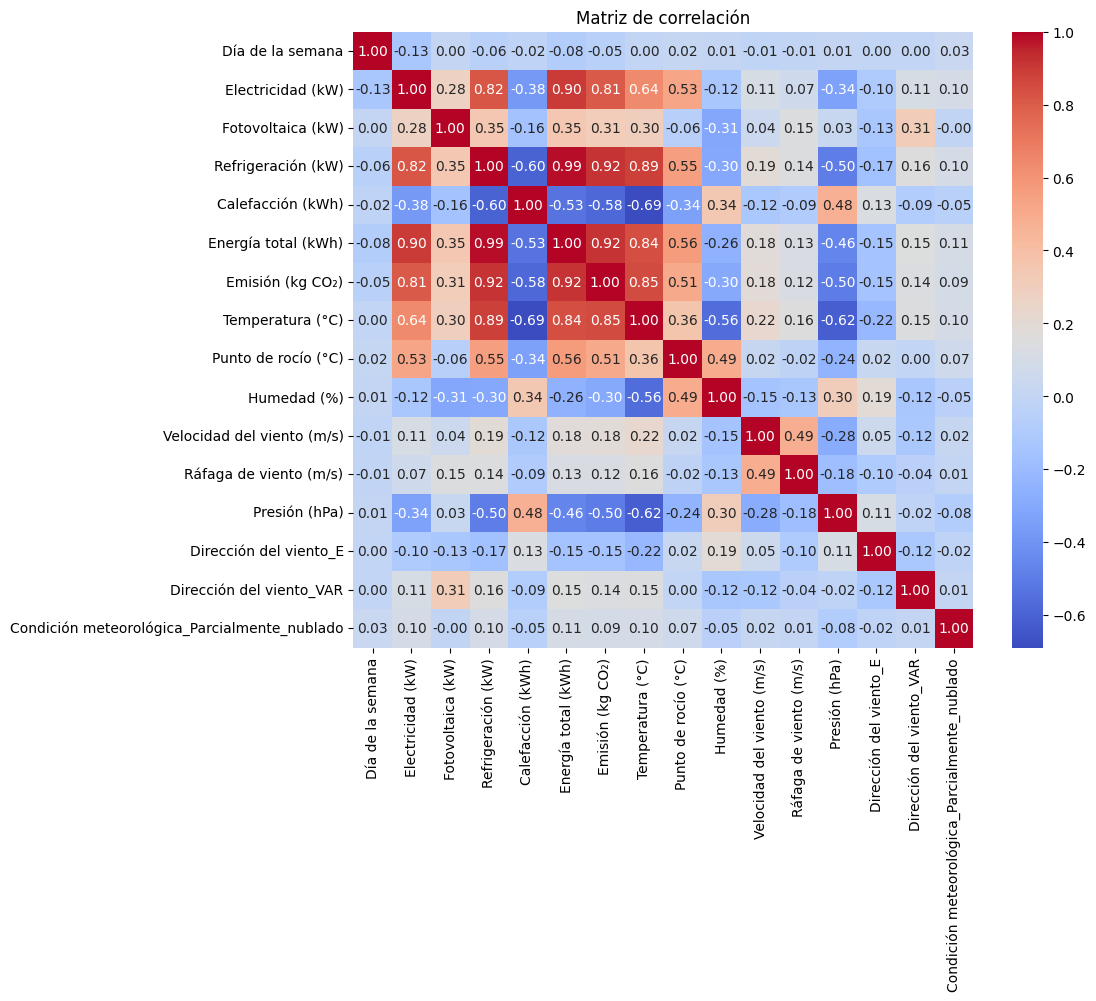

In [3960]:
# Crear la tabla de correlación
correlation_matrix = energia_climaticos.corr()

# Opcional: si quieres visualizarla de forma más atractiva con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

# Uso de IA

**Prompt:** puedes decirme como hacer join de dos datasets sin duplicados?

**Respuesta:**
```Python
df = df1.merge(df2, on="id", how="inner")
```


**Prompt:** hazme una tabla de correlacion de todas las columnas de un conjunto de datos en python

**Respuesta:**
```Python
import pandas as pd

# Cargar tu conjunto de datos
# Por ejemplo, si es un CSV:
df = pd.read_csv("ruta/a/tu/archivo.csv")

# Crear la tabla de correlación
correlation_matrix = df.corr()

# Mostrar la tabla de correlación
print(correlation_matrix)

# Opcional: si quieres visualizarla de forma más atractiva con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()
```